In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Conv2D, Conv2DTranspose, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist

In [2]:
# Load MNIST data
(X_train, _), (_, _) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Normalize data
X_train = (X_train.astype(np.float32) - 127.5) / 127.5
X_train = np.expand_dims(X_train, axis=3)

In [4]:
# Define generator
def build_generator():
    model = Sequential()
    model.add(Dense(7 * 7 * 128, input_dim=100))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((7, 7, 128)))
    model.add(Conv2DTranspose(64, kernel_size=4, strides=2, padding='same'))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(1, kernel_size=4, strides=2, padding='same', activation='tanh'))
    return model

In [5]:
# Define discriminator
def build_discriminator():
    model = Sequential()
    model.add(Conv2D(64, kernel_size=4, strides=2, padding='same', input_shape=(28, 28, 1)))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(128, kernel_size=4, strides=2, padding='same'))
    model.add(LeakyReLU(0.2))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    return model

In [6]:
# Compile discriminator
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5), metrics=['accuracy'])

In [7]:
# Combine generator and discriminator into a single model
generator = build_generator()
z = Input(shape=(100,))
img = generator(z)
discriminator.trainable = False
validity = discriminator(img)
gan = Model(z, validity)
gan.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))

In [8]:
# Train DCGAN
epochs = 1000
batch_size = 64
for epoch in range(epochs):
    # Select a random batch of images
    idx = np.random.randint(0, X_train.shape[0], batch_size)
    real_images = X_train[idx]

    # Generate fake images
    noise = np.random.normal(0, 1, (batch_size, 100))
    fake_images = generator.predict(noise)

    # Train discriminator
    d_loss_real = discriminator.train_on_batch(real_images, np.ones(batch_size))
    d_loss_fake = discriminator.train_on_batch(fake_images, np.zeros(batch_size))
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Train generator
    noise = np.random.normal(0, 1, (batch_size, 100))
    g_loss = gan.train_on_batch(noise, np.ones(batch_size))

    # Print progress
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} \t Discriminator Loss: {d_loss[0]} \t Generator Loss: {g_loss}")


2/2 [==============================] - 3s 12ms/step
Epoch: 0 	 Discriminator Loss: 0.697041392326355 	 Generator Loss: 0.6901705265045166
2/2 [==============================] - 0s 6ms/step
Epoch: 100 	 Discriminator Loss: 0.6090008914470673 	 Generator Loss: 3.281254291534424
2/2 [==============================] - 0s 6ms/step
Epoch: 200 	 Discriminator Loss: 0.4406702220439911 	 Generator Loss: 1.9439897537231445
2/2 [==============================] - 0s 6ms/step
Epoch: 300 	 Discriminator Loss: 0.499264657497406 	 Generator Loss: 1.5957632064819336
2/2 [==============================] - 0s 6ms/step
Epoch: 400 	 Discriminator Loss: 0.5707871317863464 	 Generator Loss: 1.6451683044433594
2/2 [==============================] - 0s 4ms/step
Epoch: 500 	 Discriminator Loss: 0.5333681702613831 	 Generator Loss: 1.7421410083770752
2/2 [==============================] - 0s 7ms/step
Epoch: 600 	 Discriminator Loss: 0.466350719332695 	 Generator Loss: 1.7311031818389893
2/2 [====================

In [9]:
# Generate images
noise = np.random.normal(0, 1, (100, 100))
generated_images = generator.predict(noise)

4/4 [==============================] - 0s 31ms/step


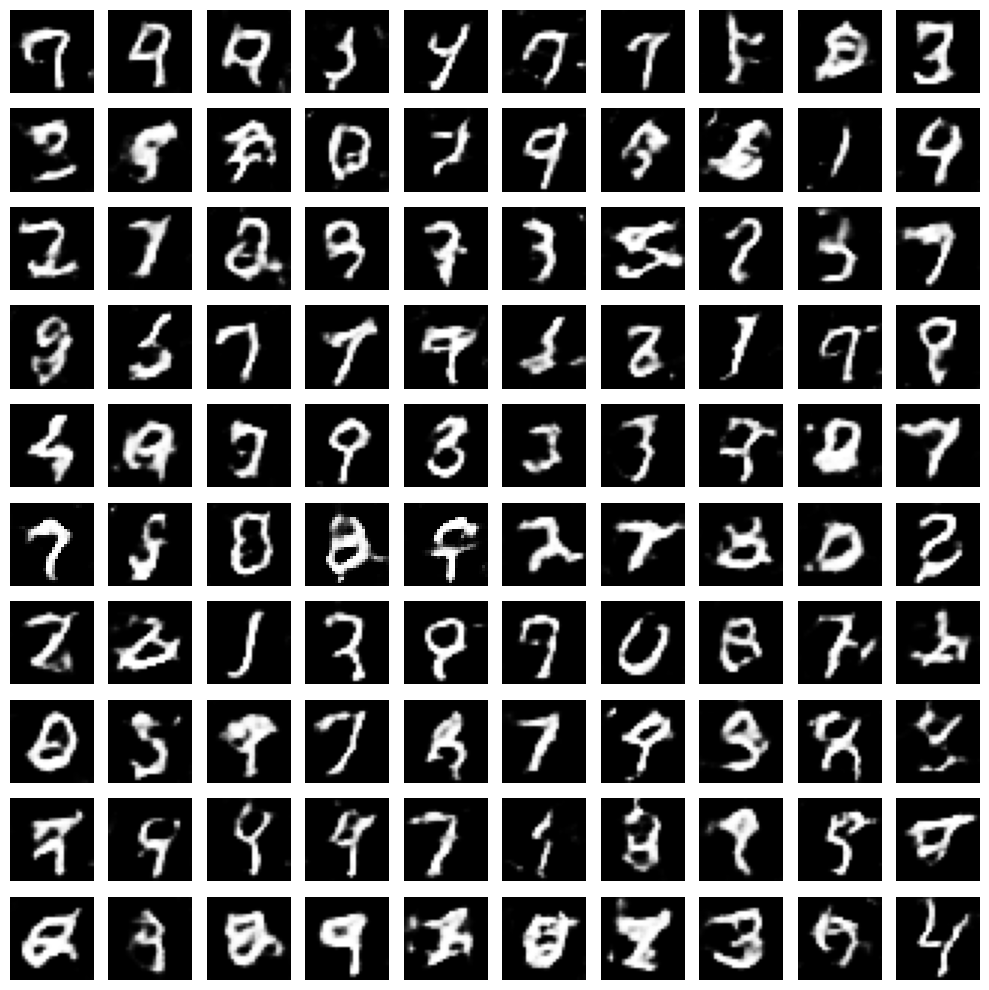

In [10]:
# Display generated images
plt.figure(figsize=(10, 10))
for i in range(100):
    plt.subplot(10, 10, i+1)
    plt.imshow(generated_images[i, :, :, 0], cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()

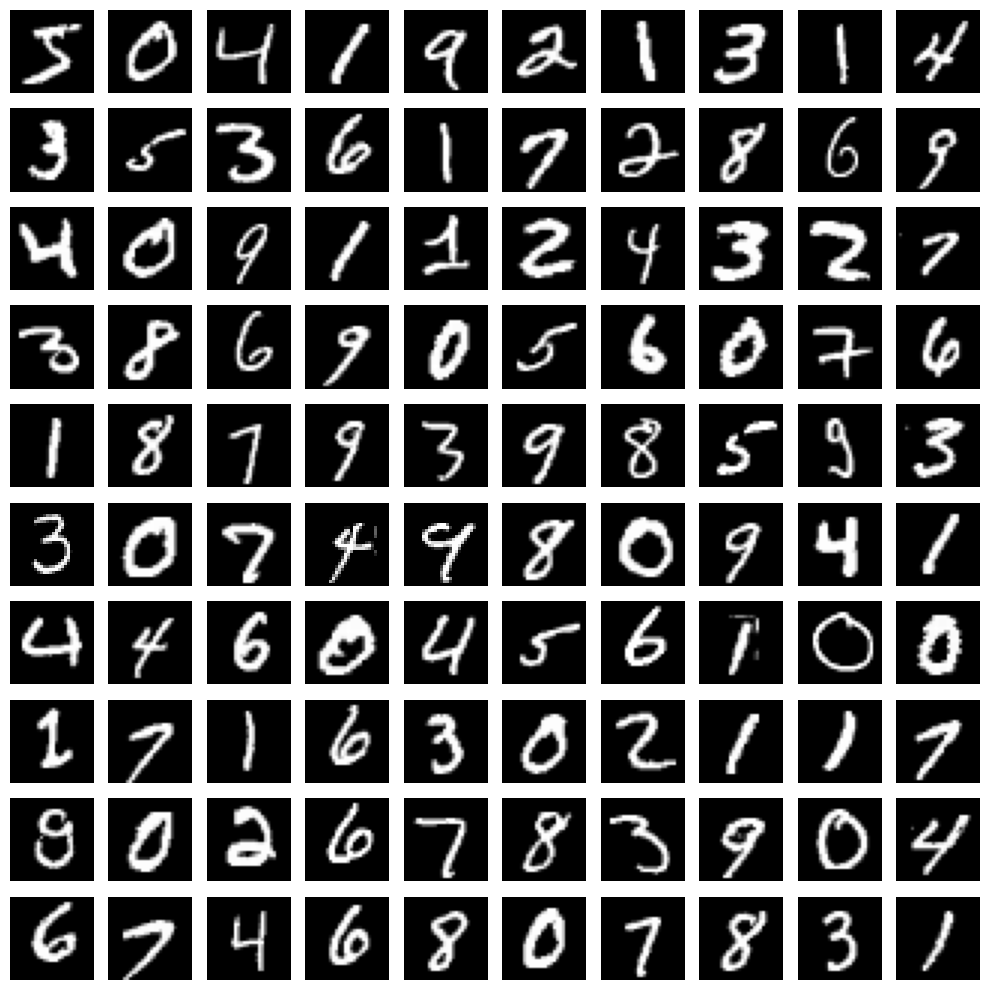

In [11]:
# Visualize original images
plt.figure(figsize=(10, 10))
for i in range(100):
    plt.subplot(10, 10, i+1)
    plt.imshow(X_train[i, :, :, 0], cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()